# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
# Import and declare environment related
from unityagents import UnityEnvironment

env = UnityEnvironment(file_name="Banana.app")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Mono path[0] = '/Users/nuocheng/Desktop/Reinforcement_Learning/RL_Valued_Based_Method/Banana.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/nuocheng/Desktop/Reinforcement_Learning/RL_Valued_Based_Method/Banana.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# Declare agent
import numpy as np
import importlib
import agent
import model
importlib.reload(agent)
importlib.reload(model)

# The path and name used to save the model
model_weight_name = 'model/checkpoint_max_t_2000.pth'

GAMMA = 0.99  # discount factor

agent = agent.DiscreteStateAgent(brain.vector_observation_space_size, brain.vector_action_space_size, GAMMA)

Episode 0	Average Score: 0.00	 Total Score: 0.00
Episode 100	Average Score: 2.13	 Total Score: 6.00
Episode 200	Average Score: 7.87	 Total Score: 8.00
Episode 300	Average Score: 10.22	 Total Score: 8.00
Episode 400	Average Score: 11.21	 Total Score: 8.00
Episode 500	Average Score: 11.61	 Total Score: 14.00
Episode 600	Average Score: 13.31	 Total Score: 22.00
Episode 700	Average Score: 14.94	 Total Score: 15.00
Episode 800	Average Score: 14.03	 Total Score: 9.00
Episode 900	Average Score: 13.84	 Total Score: 16.00
Episode 1000	Average Score: 14.11	 Total Score: 10.00
Episode 1100	Average Score: 14.59	 Total Score: 20.00
Episode 1200	Average Score: 15.00	 Total Score: 14.00
Episode 1300	Average Score: 14.86	 Total Score: 13.00
Episode 1400	Average Score: 14.59	 Total Score: 17.00
Episode 1500	Average Score: 14.39	 Total Score: 16.00
Episode 1600	Average Score: 14.74	 Total Score: 21.00
Episode 1700	Average Score: 15.19	 Total Score: 14.00
Episode 1800	Average Score: 15.28	 Total Score: 1

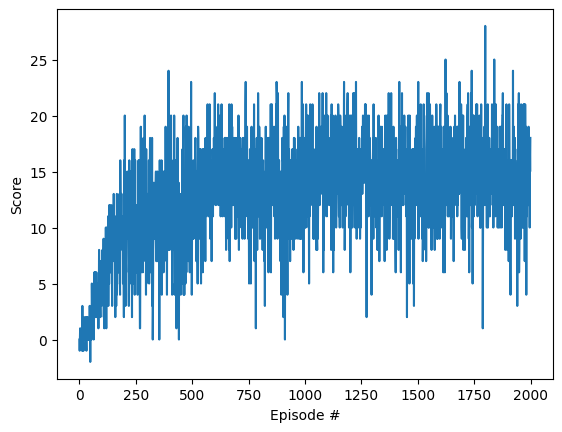

In [3]:
# Function to train the network
from collections import deque
import torch
import matplotlib.pyplot as plt

def train(agent, env, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.99):

    all_rewards = []
    rewards_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start
    for i_episode in range(n_episodes):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        total_reward = 0
        eps = max(eps_end, eps * eps_decay)
        for t in range(max_t):
            # get action from the agent based on the curernt states
            action = agent.act(state, eps)
            # update the env based on the action
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            # update the agent
            agent.step(state, action, reward, next_state, done)
            # update for the next iteration
            state = next_state
            total_reward += reward
            # the episode reachs the end, so need to start a new episode
            if done:
                break
        all_rewards.append(total_reward)
        rewards_window.append(total_reward)
        if i_episode % 100 == 0:
            print('Episode {}\tAverage Score: {:.2f}\t Total Score: {:.2f}'.format(i_episode, np.mean(rewards_window), np.mean(total_reward)))
        if np.mean(rewards_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(rewards_window)))
            break
    
    return all_rewards

scores = train(agent, env, 2000, 1000)
env.close()

# save the trained weight
torch.save(agent.network_local.state_dict(), model_weight_name)

# plot the score distribution
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
# A block to load and evaluate the model
from unityagents import UnityEnvironment
import importlib
import agent
import model
import torch
importlib.reload(agent)
importlib.reload(model)

env = UnityEnvironment(file_name="Banana.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

agent = agent.DiscreteStateAgent(brain.vector_observation_space_size, brain.vector_action_space_size, 0.99)
agent.network_local.load_state_dict(torch.load(model_weight_name))

# test the model
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
env.close()
print("Score: {}".format(score))